## Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
%matplotlib inline

## Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/Assignment 5 Case Study 3 - Insurance Claims Case Study/claims.csv')
cust_demo = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/Assignment 5 Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

claims.info()
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 

In [3]:
cust_claims = pd.merge(claims, cust_demo, how='outer', left_on='customer_id', right_on='CUST_ID').drop('customer_id', axis=1)
cust_claims

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74888099.0,Male,22-Jul-80,CO,125-613-7698,Platinum
1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36009093.0,Female,04-Jun-84,SC,264-374-5794,Platinum
1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60016590.0,Female,25-May-84,NV,649-742-8132,Silver
1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96861647.0,Female,06-Aug-96,NH,495-732-2638,Silver


## Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [4]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   float64
 1   incident_cause       1100 non-null   object 
 2   claim_date           1100 non-null   object 
 3   claim_area           1100 non-null   object 
 4   police_report        1100 non-null   object 
 5   claim_type           1100 non-null   object 
 6   claim_amount         1035 non-null   object 
 7   total_policy_claims  1090 non-null   float64
 8   fraudulent           1100 non-null   object 
 9   CUST_ID              1092 non-null   float64
 10  gender               1092 non-null   object 
 11  DateOfBirth          1092 non-null   object 
 12  State                1092 non-null   object 
 13  Contact              1092 non-null   object 
 14  Segment              1092 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [5]:
print('claim_id, claim_date, claim_amount, total_policy_claims, CUST_ID, DateOfBirth & Contact - These columns have wrong datatypes')

claim_id, claim_date, claim_amount, total_policy_claims, CUST_ID, DateOfBirth & Contact - These columns have wrong datatypes


In [6]:
cust_claims.claim_id = [pd.to_numeric(x) for x in cust_claims.claim_id]

cust_claims.claim_date = pd.to_datetime(cust_claims.claim_date, format = "%m/%d/%Y")

cust_claims.total_policy_claims = pd.to_numeric(cust_claims.total_policy_claims)

cust_claims.CUST_ID = [pd.to_numeric(x) for x in cust_claims.CUST_ID]

cust_claims.DateOfBirth = pd.to_datetime(cust_claims.DateOfBirth, format = "%d-%b-%y")

cust_claims.Contact = pd.to_numeric(cust_claims.Contact.str.replace("-",""))

In [7]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   float64       
 1   incident_cause       1100 non-null   object        
 2   claim_date           1100 non-null   datetime64[ns]
 3   claim_area           1100 non-null   object        
 4   police_report        1100 non-null   object        
 5   claim_type           1100 non-null   object        
 6   claim_amount         1035 non-null   object        
 7   total_policy_claims  1090 non-null   float64       
 8   fraudulent           1100 non-null   object        
 9   CUST_ID              1092 non-null   float64       
 10  gender               1092 non-null   object        
 11  DateOfBirth          1092 non-null   datetime64[ns]
 12  State                1092 non-null   object        
 13  Contact              1092 non-nul

## Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [8]:
cust_claims.claim_amount = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""))
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   float64       
 1   incident_cause       1100 non-null   object        
 2   claim_date           1100 non-null   datetime64[ns]
 3   claim_area           1100 non-null   object        
 4   police_report        1100 non-null   object        
 5   claim_type           1100 non-null   object        
 6   claim_amount         1035 non-null   float64       
 7   total_policy_claims  1090 non-null   float64       
 8   fraudulent           1100 non-null   object        
 9   CUST_ID              1092 non-null   float64       
 10  gender               1092 non-null   object        
 11  DateOfBirth          1092 non-null   datetime64[ns]
 12  State                1092 non-null   object        
 13  Contact              1092 non-nul

/var/folders/4k/94mrg8ls5sn8rvlmp_20rcqh0000gn/T/ipykernel_77081/3293259521.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims.claim_amount = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""))


## Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [9]:

injury_claim = (cust_claims.claim_type.str.lower().str.contains('injury')) & (cust_claims.police_report == 'No')

cust_claims['alert'] = np.where(injury_claim, 1, 0)
cust_claims.head(20)

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert
0,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,0
1,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,0
2,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,0
3,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,0
4,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,0
5,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,0
6,22890252.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,0
7,39219616.0,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,0
8,24050443.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191.0,Male,1977-05-17,NH,4.197129e+09,Gold,1
9,91475471.0,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191.0,Male,1977-05-17,NH,4.197129e+09,Gold,0


## Q5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.

In [10]:
cust_claims2 = cust_claims.groupby('CUST_ID').first().reset_index()
cust_claims2

,CUST_ID,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert
0,154557.0,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,9.628791e+09,Platinum,1
1,263204.0,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,1.738926e+09,Silver,1
2,287476.0,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,3.645982e+09,Silver,0
3,441097.0,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,1.873488e+09,Gold,0
4,524545.0,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,7.988625e+09,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,99674324.0,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,2065-01-28,UT,5.175625e+09,Silver,1
1081,99723844.0,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,2066-06-19,HI,4.577521e+09,Gold,0
1082,99761663.0,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,2063-11-18,NC,6.432465e+09,Silver,0
1083,99892000.0,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,Male,1995-06-08,OR,3.952466e+09,Gold,0


## Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [11]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   float64       
 1   incident_cause       1100 non-null   object        
 2   claim_date           1100 non-null   datetime64[ns]
 3   claim_area           1100 non-null   object        
 4   police_report        1100 non-null   object        
 5   claim_type           1100 non-null   object        
 6   claim_amount         1035 non-null   float64       
 7   total_policy_claims  1090 non-null   float64       
 8   fraudulent           1100 non-null   object        
 9   CUST_ID              1092 non-null   float64       
 10  gender               1092 non-null   object        
 11  DateOfBirth          1092 non-null   datetime64[ns]
 12  State                1092 non-null   object        
 13  Contact              1092 non-nul

In [12]:
cat_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","alert","police_report"]
con_col = ["claim_amount", "total_policy_claims"]

for col in cat_col:
    cust_claims[col] = cust_claims[col].fillna(cust_claims[col].mode()[0])

for col in con_col:
    cust_claims[col] = cust_claims[col].fillna(cust_claims[col].mean())
    
cust_claims.total_policy_claims = round(cust_claims.total_policy_claims)
cust_claims.claim_amount = round(cust_claims.claim_amount)


cust_claims

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert
0,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,0
1,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,0
2,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3370.0,1.0,Yes,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,0
3,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,0
4,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,74888099.0,Male,1980-07-22,CO,1.256138e+09,Platinum,0
1103,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,36009093.0,Female,1984-06-04,SC,2.643746e+09,Platinum,0
1104,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,60016590.0,Female,1984-05-25,NV,6.497428e+09,Silver,0
1105,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,96861647.0,Female,1996-08-06,NH,4.957323e+09,Silver,0


## Q7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [13]:
# DateOfBirth Column has few dates in the 21st century. First we treat those values

cust_claims.DateOfBirth = np.where((cust_claims.DateOfBirth > datetime.now()), cust_claims.DateOfBirth - pd.DateOffset(years=100), cust_claims.DateOfBirth)

In [14]:
cust_claims['Age'] = [datetime.now().year - x.year for x in cust_claims.DateOfBirth]

In [15]:
cust_claims['Age_Cat'] = pd.cut(cust_claims.Age, bins=[0,18,30,60,cust_claims.Age.max() ], labels=['Children','Youth','Adult','Senior'])
cust_claims

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert,Age,Age_Cat
0,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,0,44.0,Adult
1,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,0,53.0,Adult
2,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3370.0,1.0,Yes,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,0,39.0,Adult
3,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,0,39.0,Adult
4,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,0,37.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,74888099.0,Male,1980-07-22,CO,1.256138e+09,Platinum,0,43.0,Adult
1103,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,36009093.0,Female,1984-06-04,SC,2.643746e+09,Platinum,0,39.0,Adult
1104,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,60016590.0,Female,1984-05-25,NV,6.497428e+09,Silver,0,39.0,Adult
1105,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,96861647.0,Female,1996-08-06,NH,4.957323e+09,Silver,0,27.0,Youth


## Q8. What is the average amount claimed by the customers from various segments?

In [16]:
cust_claims.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12745.670077
Platinum    12341.717808
Silver      12208.390313
Name: claim_amount, dtype: float64

## Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [17]:
cust_claims.loc[cust_claims.claim_date <= pd.to_datetime('19-09-2018', format="%d-%m-%Y")].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                  733363.0
Driver error          3350782.0
Natural causes        1324860.0
Other causes          3960636.0
Other driver error    3429205.0
Name: claim_amount, dtype: float64

## Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [18]:
cust_claims.loc[(cust_claims.incident_cause.str.lower().str.contains("driver") 
             & ((cust_claims.State == "TX") | (cust_claims.State == "DE") | (cust_claims.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    11
DE    15
TX    10
Name: State, dtype: int64

## Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

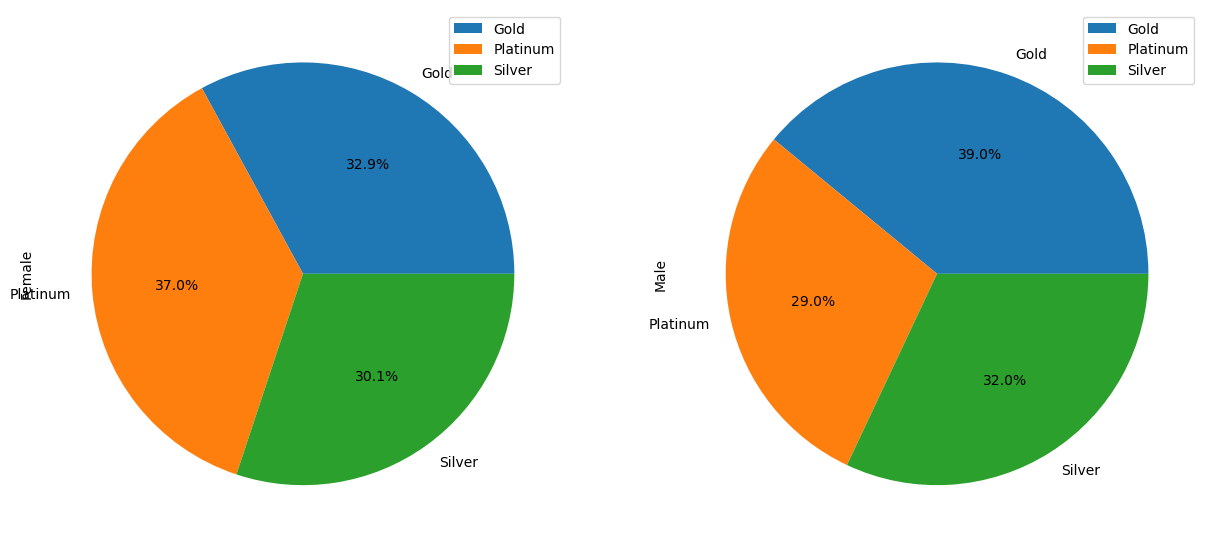

In [19]:
cust_claims.pivot_table(index='Segment', columns='gender', values='claim_amount', aggfunc='sum').plot(kind='pie', subplots=True, figsize=(15,8), autopct='%1.1f%%')

## Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [20]:
gender_drv_clm = cust_claims.pivot_table(index='incident_cause', columns='gender', values='claim_amount', aggfunc='sum').T.drop(['Crime', 'Natural causes','Other causes'], axis=1)

<Axes: xlabel='gender'>

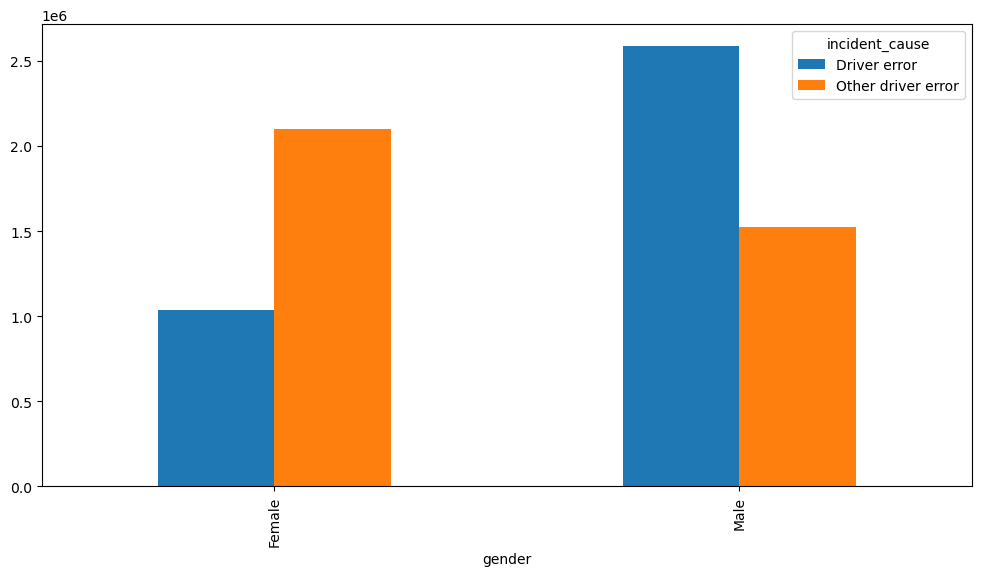

In [21]:
gender_drv_clm.plot(kind='bar', figsize=(12,6))

## Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

Adult Age Group has more Fraudulent Policy Claims


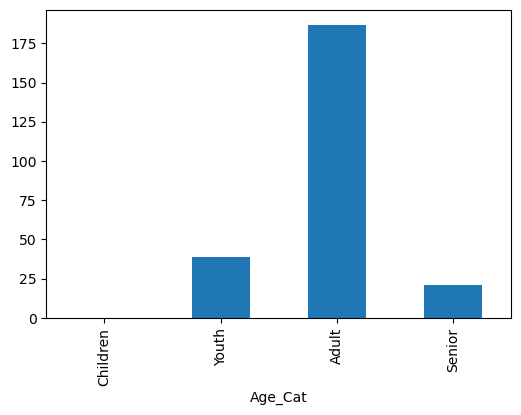

In [22]:
cust_claims[cust_claims.fraudulent == 'Yes'].groupby('Age_Cat')['fraudulent'].count().plot(kind='bar', figsize=(6,4))

print('Adult Age Group has more Fraudulent Policy Claims')

## Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [23]:
monthly_trend = cust_claims.groupby("claim_date")["claim_amount"].sum().reset_index()

In [24]:
monthly_trend['Monthly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
monthly_trend['Month_No'] = monthly_trend['Monthly'].apply(lambda x:pd.to_datetime(x,format="%B").month)

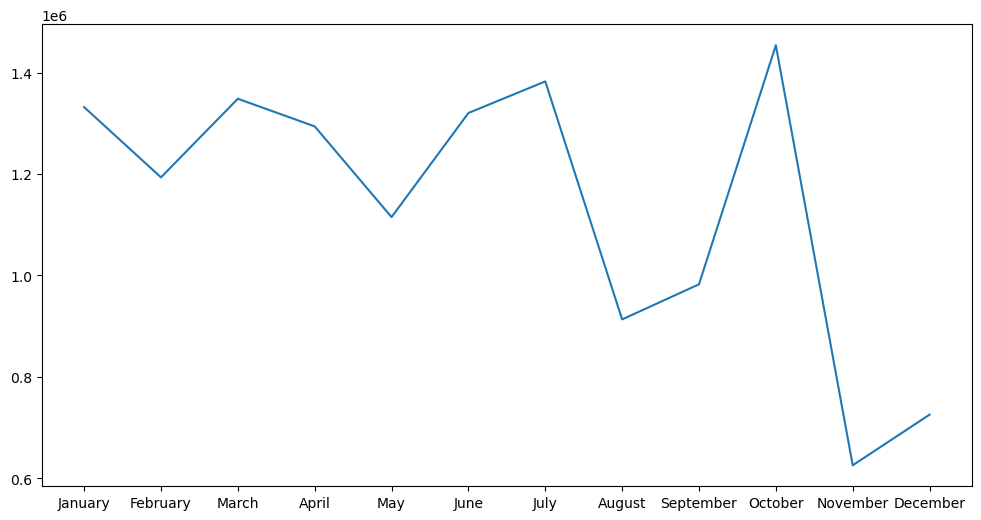

In [25]:
##monthly_trend = monthly_trend.groupby(["Monthly"])[["claim_amount"]].sum().reset_index()
monthly_trend_data = monthly_trend.groupby(["Monthly","Month_No"])[["claim_amount"]].sum().reset_index().sort_values(by='Month_No')
plt.figure(figsize=(12,6))
plt.plot(monthly_trend_data.Monthly, monthly_trend_data.claim_amount, label = 'Trend Line')

## Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [30]:
cust_claims

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert,Age,Age_Cat
0,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,0,44.0,Adult
1,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,0,53.0,Adult
2,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3370.0,1.0,Yes,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,0,39.0,Adult
3,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,0,39.0,Adult
4,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,0,37.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,74888099.0,Male,1980-07-22,CO,1.256138e+09,Platinum,0,43.0,Adult
1103,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,36009093.0,Female,1984-06-04,SC,2.643746e+09,Platinum,0,39.0,Adult
1104,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,60016590.0,Female,1984-05-25,NV,6.497428e+09,Silver,0,39.0,Adult
1105,NaN,Other causes,NaT,Auto,No,Material only,12442.0,2.0,No,96861647.0,Female,1996-08-06,NH,4.957323e+09,Silver,0,27.0,Youth


In [75]:
cust_fraud = cust_claims[cust_claims.fraudulent=='Yes'].groupby(['gender','Age_Cat'])['claim_amount'].mean().reset_index()
cust_non_fraud = cust_claims[cust_claims.fraudulent=='No'].groupby(['gender','Age_Cat'])['claim_amount'].mean().reset_index()

[Text(0.5, 0, 'Age Category'), Text(0, 0.5, 'Average Claim Amount')]

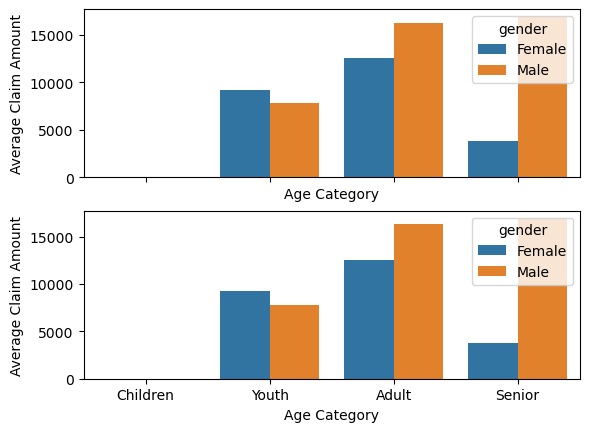

In [89]:
f, axs = plt.subplots(2,1, sharex=True)

sns.barplot(data=cust_fraud, x=cust_fraud.Age_Cat, y=cust_fraud.claim_amount, hue=cust_fraud.gender, ax=axs[0])

sns.barplot(data=cust_non_fraud, x=cust_fraud.Age_Cat, y=cust_fraud.claim_amount, hue=cust_fraud.gender, ax=axs[1])


axs[0].set(xlabel='Age Category', ylabel='Average Claim Amount')

axs[1].set(xlabel='Age Category', ylabel='Average Claim Amount')

## Q16. Is there any similarity in the amount claimed by males and females?

In [97]:
male_claim = cust_claims.loc[ cust_claims.gender == "Male", 'claim_amount' ]
female_claim = cust_claims.loc[ cust_claims.gender == "Female", 'claim_amount' ]

print( 'mean of male spend: ', male_claim.mean(), '| mean of female spend: ', female_claim.mean() )

mean of male spend:  12793.757417102966 | mean of female spend:  12064.805243445693


### H0 (Null Hypothesis) -> male_claim mean = female_claim mean
### Ha (Alt. Hypothesis) -> male_claim mean != female_claim mean 
### Confidence Interval -> 95% 
### p-Value -> 0.05

### We conduct T-Test to compare the means of both 

In [98]:
stats.ttest_ind( male_claim, female_claim )

Ttest_indResult(statistic=0.9104097721196385, pvalue=0.3628049908297557)

**The Results of P-Value show T-score = 0.91 and p-Value = 0.36. Since p-Value is Greater than the decided Significance Level of 0.05, we accept the Null Hypothesis. It means the average claim amount by both Male and Female are almost same.**

## Q17. Is there any relationship between age category and segment?

### Ho (Null Hypothesis) -> No Relationship between Age Category and Segment
### Ha (Alt. Hypothesis) -> There is a relationship between Age Category and Segment
### Confidence Interval -> 95%
### p-Value -> 0.05

### We Will use Chi-Squared Test to determine the relationship between the 2 categorical variables


In [100]:
obs_freq = pd.crosstab(cust_claims.Age_Cat, cust_claims.Segment)
obs_freq

Segment,Gold,Platinum,Silver
Age_Cat,,,
Youth,71,70,69
Adult,277,269,260
Senior,28,26,22


In [101]:
stats.chi2_contingency( obs_freq )

Chi2ContingencyResult(statistic=0.44609000430015155, pvalue=0.9785324305215995, dof=4, expected_freq=array([[ 72.30769231,  70.19230769,  67.5       ],
       [277.52380952, 269.4047619 , 259.07142857],
       [ 26.16849817,  25.4029304 ,  24.42857143]]))

**From the above Chi2 Test we got p-Value= 0.97 which is higher than the decided p-value and this we accept the null hypothesis. We conclude that there is no relationship between Age Category and Segment.

## Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

Fiscal Year in India is defined from 1st April of previous year to 31st March of current year
In this example we will be comparing average claim amount for 2016-17 & 2017-18

In [114]:
cust_claims_FY17 = cust_claims.loc[(cust_claims.claim_date>=datetime(2016,4,1)) & (cust_claims.claim_date<=datetime(2017,3,31))]
cust_claims_FY18 = cust_claims.loc[(cust_claims.claim_date>=datetime(2017,4,1)) & (cust_claims.claim_date<=datetime(2018,3,31))]

### Ho -> Claim amount mean for FY2018 <= 10,000
### Ha -> Claim amount mean for FY2018 > 10,000
### Confidence Interval ->95%
### p-Value -> 0.05

### We will be conducting a T-Test

In [134]:
stats.ttest_1samp(cust_claims_FY18.claim_amount, 10000 )

TtestResult(statistic=5.266585570396551, pvalue=1.9568395316144605e-07, df=584)

**Based on the T-Test Result we can observe that the p-value is less than the decided p-value of 0.05. So we reject the Null Hypothesis and we can conclude that the Alternate Hypothesis is true. Thus, we can verify that FY2018 year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average.**

## Q19. Is there any difference between age groups and insurance claims?

In [137]:
adult_claim = cust_claims.loc[cust_claims.Age_Cat == 'Adult', 'claim_amount']
youth_claim = cust_claims.loc[cust_claims.Age_Cat == 'Youth', 'claim_amount']
senior_claim = cust_claims.loc[cust_claims.Age_Cat == 'Senior', 'claim_amount']

### Ho -> There are no differences among Age group Insurance Claim means
### Ha -> There are differences in Age group Insurance Claim means
### Confidence interval -> 95%
### p-Value -> 0.05

### We use Anova Test to compare means of all 3 age groups 

In [138]:
stats.f_oneway( adult_claim, youth_claim, senior_claim)

F_onewayResult(statistic=0.3009355069735221, pvalue=0.7401870335052481)

**From the ANOVA Test we can observe the p_value is greater than the decided p-Value and so we accept the null hypothesis that There are no differences among Age group and Insurance Claims.

## Is there any relationship between total number of policy claims and the claimed amount?

### Ho -> There is no difference among means in claim amount for total number of claims. 
### Ha -> There is difference in average claim amount for total number of claims
### Confidence interval -> 95%
### p-Value -> 0.05

### We use ANOVA Test to determine whether there is any relationship between total number of policy claims and the claimed amount

In [141]:
total_claims_1 = cust_claims.loc[ cust_claims.total_policy_claims == 1.0, 'claim_amount' ]
total_claims_2 = cust_claims.loc[ cust_claims.total_policy_claims == 2.0, 'claim_amount' ]
total_claims_3 = cust_claims.loc[ cust_claims.total_policy_claims == 3.0, 'claim_amount' ]
total_claims_4 = cust_claims.loc[ cust_claims.total_policy_claims == 4.0, 'claim_amount' ]
total_claims_5 = cust_claims.loc[ cust_claims.total_policy_claims == 5.0, 'claim_amount' ]
total_claims_6 = cust_claims.loc[ cust_claims.total_policy_claims == 6.0, 'claim_amount' ]
total_claims_7 = cust_claims.loc[ cust_claims.total_policy_claims == 7.0, 'claim_amount' ]
total_claims_8 = cust_claims.loc[ cust_claims.total_policy_claims == 8.0, 'claim_amount' ]

In [143]:
stats.f_oneway( total_claims_1, total_claims_2, total_claims_3, total_claims_4, total_claims_5, total_claims_6, total_claims_7, total_claims_8 )

F_onewayResult(statistic=0.9143223109869009, pvalue=0.49432255145887316)

**Based on ANOVA Test results we can observe that the p-Value is higher than the decided p-Value of 0.05. So we accept the null hypothesis. Thus, we can say that there is no difference in average claim amount for total number of claims and hence there is no relationship.**